## Importing the libraries


In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import glob

import warnings

warnings.filterwarnings("ignore")

import datetime

 -----------------------------------------------------------------------------------------------------------------------

## Importing the files as pandas dataframes

In [2]:
# specify the folder path containing the CSV files

folder_path = "D:\Projects\Python\Delivery center - Food & goods orders analysis/*.csv"

# get a list of all the CSV files in the folder

files = glob.glob(folder_path)

# create an empty list to store the DataFrames

dfs = []

# loop through each file and read the data into a DataFrame

for i, file in enumerate(files):
    
    df = pd.read_csv(file, encoding='ISO-8859-1')
    
    # append the dataframe to the list of dataframes
    
    dfs.append(df)
    
    # create a global variable with the name df<i> where <i> is the index of the current file in the files list
    
    # the global variable points to the current DataFrame
    
    globals()['df{}'.format(i+1)] = df


 ----------------------------------------------------------------------------------------------------------------------------

## Exploratory Data Analysis and Data cleaning 

#### *Dataset: "channels"*

In [3]:
df1.head()

,channel_id,channel_name,channel_type
0,1,OTHER PLACE,OWN CHANNEL
1,2,PHONE PLACE,OWN CHANNEL
2,3,WHATS PLACE,OWN CHANNEL
3,4,FACE PLACE,OWN CHANNEL
4,5,FOOD PLACE,MARKETPLACE


In [4]:
df1.shape

(40, 3)

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_id    40 non-null     int64 
 1   channel_name  40 non-null     object
 2   channel_type  40 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.1+ KB


In [6]:
# Changing the data type of 'channel_id' column from <int64> to <object>
# ======================================================================

df1['channel_id'] = df1['channel_id'].astype(str)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_id    40 non-null     object
 1   channel_name  40 non-null     object
 2   channel_type  40 non-null     object
dtypes: object(3)
memory usage: 1.1+ KB


In [8]:
# Checking for null records
# =========================

df1.isnull().sum()

channel_id      0
channel_name    0
channel_type    0
dtype: int64

In [9]:
# Checking for duplicate records
# ==============================

print('The "{}" dataset contains {} duplicate records'.format('channels', df1.duplicated().sum()))

The "channels" dataset contains 0 duplicate records


In [10]:
# Changing the format of the texts in the 'channel_name' and the 'channel_type' columns into proper case
# ======================================================================================================

df1['channel_name'] = df1['channel_name'].str.title()

df1['channel_type'] = df1['channel_type'].str.title()

In [11]:
# Dataset summary
# ==================

df1.describe()

,channel_id,channel_name,channel_type
count,40,40,40
unique,40,40,2
top,1,Other Place,Marketplace
freq,1,1,26


#### *Dataset: "deliveries"*

In [12]:
df2.head()

,delivery_id,delivery_order_id,driver_id,delivery_distance_meters,delivery_status
0,2174658,68413340,8378.0,5199.0,DELIVERED
1,2174660,68414309,2473.0,410.0,DELIVERED
2,2174661,68416230,7615.0,3784.0,DELIVERED
3,2174663,68412721,8378.0,5714.0,DELIVERED
4,2174675,68414018,10463.0,3746.0,DELIVERED


In [13]:
df2.shape

(378843, 5)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378843 entries, 0 to 378842
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               378843 non-null  int64  
 1   delivery_order_id         378843 non-null  int64  
 2   driver_id                 362957 non-null  float64
 3   delivery_distance_meters  378770 non-null  float64
 4   delivery_status           378843 non-null  object 
dtypes: float64(2), int64(2), object(1)
memory usage: 14.5+ MB


In [15]:
# Changing the data type of 'delivery_id', 'delivery_order_id', and 'driver_id' columns to <object>
# ================================================================================================

def change_type(dataset, column_name, data_type):

    dataset[column_name] = dataset[column_name].astype(data_type)
    
change_type(df2, 'delivery_id', str)

change_type(df2, 'delivery_order_id', str)

change_type(df2, 'driver_id', str)

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378843 entries, 0 to 378842
Data columns (total 5 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   delivery_id               378843 non-null  object 
 1   delivery_order_id         378843 non-null  object 
 2   driver_id                 378843 non-null  object 
 3   delivery_distance_meters  378770 non-null  float64
 4   delivery_status           378843 non-null  object 
dtypes: float64(1), object(4)
memory usage: 14.5+ MB


In [17]:
# Checking for null records
# =========================

df2.isnull().sum()

delivery_id                  0
delivery_order_id            0
driver_id                    0
delivery_distance_meters    73
delivery_status              0
dtype: int64

In [18]:
# Filling the null values in the 'driver_id' column 
# =================================================

df2['driver_id'] = df2['driver_id'].fillna(0.0)

In [19]:
# Dropping null records from the 'delivery_distance_meters' column
# ================================================================

df2 = df2.dropna(subset = ['delivery_distance_meters'])

In [20]:
# Changing the format of the text in the 'delivery_status' column into proper case
# ================================================================================

df2['delivery_status'] = df2['delivery_status'].str.title()

In [21]:
# Checking for duplicate records
# ==============================

print('The "{}" dataset contains {} duplicate records'.format('deliveries', df2.duplicated().sum()))

The "deliveries" dataset contains 0 duplicate records


In [22]:
# Dataset summary
# =================

df2.describe(include = 'object')

,delivery_id,delivery_order_id,driver_id,delivery_status
count,378770,378770,378770,378770
unique,378770,358583,4584,3
top,2174658,75904541,nan,Delivered
freq,1,8,15842,371294


In [23]:
df2.describe()

,delivery_distance_meters
count,3.787700e+05
mean,1.072136e+04
std,2.315392e+05
min,0.000000e+00
25%,1.184000e+03
50%,2.073000e+03
75%,3.507000e+03
max,7.251291e+06


<AxesSubplot:>

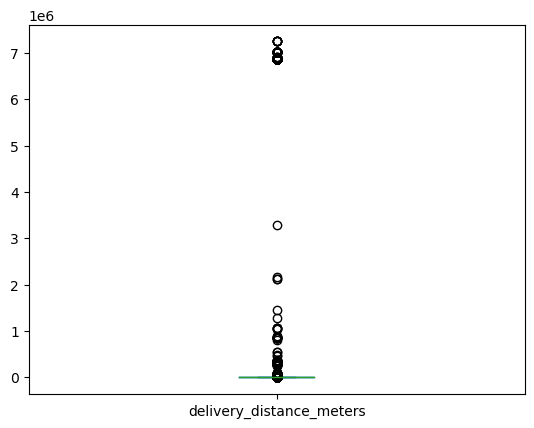

In [5]:
# Checking the disribution of values in the 'delivery_distance_meters' 
# ====================================================================

df2['delivery_distance_meters'].plot(kind = 'box')

In [25]:
# Removing the outliers
# =====================

df2 = df2[df2['delivery_distance_meters'] <= 10000]

#### *Dataset: "drivers"*

In [26]:
df3.head()

,driver_id,driver_modal,driver_type
0,133,MOTOBOY,LOGISTIC OPERATOR
1,138,MOTOBOY,FREELANCE
2,140,MOTOBOY,FREELANCE
3,143,BIKER,FREELANCE
4,148,MOTOBOY,FREELANCE


In [27]:
df3.shape

(4824, 3)

In [28]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4824 non-null   int64 
 1   driver_modal  4824 non-null   object
 2   driver_type   4824 non-null   object
dtypes: int64(1), object(2)
memory usage: 113.2+ KB


In [29]:
# Changing the data type of 'driver_id' into an <object>
# ======================================================

df3['driver_id'] = df3['driver_id'].astype(str)

In [30]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4824 entries, 0 to 4823
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   driver_id     4824 non-null   object
 1   driver_modal  4824 non-null   object
 2   driver_type   4824 non-null   object
dtypes: object(3)
memory usage: 113.2+ KB


In [31]:
# Checking for null records
# =========================

df3.isnull().sum()

driver_id       0
driver_modal    0
driver_type     0
dtype: int64

In [32]:
# Checking for duplicate records
# ==============================

print('The "{}" dataset contains {} duplicate records'.format('drivers', df3.duplicated().sum()))

The "drivers" dataset contains 0 duplicate records


In [33]:
# Changing the format of the text in the 'driver_type' and 'driver_modal' columns into proper case
# =================================================================================================

df3['driver_type'] = df3['driver_type'].str.title()

df3['driver_modal'] = df3['driver_modal'].str.title()

In [34]:
# Dataset summary
# ==================

df3.describe()

,driver_id,driver_modal,driver_type
count,4824,4824,4824
unique,4824,2,2
top,133,Motoboy,Freelance
freq,1,3222,3939


#### *Dataset: "hubs"*

In [35]:
df4.head()

,hub_id,hub_name,hub_city,hub_state,hub_latitude,hub_longitude
0,2,BLUE SHOPPING,PORTO ALEGRE,RS,-30.047415,-51.213510
1,3,GREEN SHOPPING,PORTO ALEGRE,RS,-30.037415,-51.203520
2,4,RED SHOPPING,PORTO ALEGRE,RS,-30.021948,-51.208382
3,5,FUNK SHOPPING,RIO DE JANEIRO,RJ,-23.000750,-43.318282
4,8,GOLDEN SHOPPING,RIO DE JANEIRO,RJ,-22.921475,-43.234774


In [36]:
df4.shape

(32, 6)

In [37]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hub_id         32 non-null     int64  
 1   hub_name       32 non-null     object 
 2   hub_city       32 non-null     object 
 3   hub_state      32 non-null     object 
 4   hub_latitude   32 non-null     float64
 5   hub_longitude  32 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ KB


In [38]:
# Changing the data type of 'hub_id' to <object>
# ==============================================

df4['hub_id'] = df4['hub_id'].astype(str)

In [39]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   hub_id         32 non-null     object 
 1   hub_name       32 non-null     object 
 2   hub_city       32 non-null     object 
 3   hub_state      32 non-null     object 
 4   hub_latitude   32 non-null     float64
 5   hub_longitude  32 non-null     float64
dtypes: float64(2), object(4)
memory usage: 1.6+ KB


In [40]:
# Checking for null records
# =========================

df4.isnull().sum()

hub_id           0
hub_name         0
hub_city         0
hub_state        0
hub_latitude     0
hub_longitude    0
dtype: int64

In [41]:
# Checking for duplicate records
# ==============================

print('The "{}" dataset contains {} duplicate records'.format('hubs', df4.duplicated().sum()))

The "hubs" dataset contains 0 duplicate records


In [42]:
# Changing the text formatting of 'hub_name' and 'hub_city' columns to proper case
# ================================================================================

df4['hub_name'] = df4['hub_name'].str.title()

df4['hub_city'] = df4['hub_city'].str.title()

In [43]:
# Removing the 'hub_longitude' and 'hub_latitude' columns which are unncessary
# ============================================================================

df4 = df4.drop(columns = ['hub_latitude', 'hub_longitude'])

In [44]:
# Dataset summary
# ===============

df4.describe()

,hub_id,hub_name,hub_city,hub_state
count,32,32,32,32
unique,32,32,4,4
top,2,Blue Shopping,São Paulo,SP
freq,1,1,15,15


#### *Dataset: "orders"*

In [45]:
df5.head()

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status,order_amount,order_delivery_fee,order_delivery_cost,order_created_hour,...,order_moment_delivering,order_moment_delivered,order_moment_finished,order_metric_collected_time,order_metric_paused_time,order_metric_production_time,order_metric_walking_time,order_metric_expediton_speed_time,order_metric_transit_time,order_metric_cycle_time
0,68405119,3512,5,68405119,68405119,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,68405123,3512,5,68405123,68405123,CANCELED,62.7,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,68405206,3512,5,68405206,68405206,CANCELED,115.5,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,68405465,3401,5,68405465,68405465,CANCELED,55.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,68406064,3401,5,68406064,68406064,CANCELED,37.9,0.0,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
df5.shape

(368999, 29)

In [47]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   order_id                           368999 non-null  int64  
 1   store_id                           368999 non-null  int64  
 2   channel_id                         368999 non-null  int64  
 3   payment_order_id                   368999 non-null  int64  
 4   delivery_order_id                  368999 non-null  int64  
 5   order_status                       368999 non-null  object 
 6   order_amount                       368999 non-null  float64
 7   order_delivery_fee                 368999 non-null  float64
 8   order_delivery_cost                361794 non-null  float64
 9   order_created_hour                 368999 non-null  int64  
 10  order_created_minute               368999 non-null  int64  
 11  order_created_day                  3689

In [48]:
# Changing the data type of 'order_id', 'store_id', 'channel_id', 'payment_order_id', and 'delivery_order_id' columns to <object>
# ===============================================================================================================================

change_type(df5, 'order_id', str)

change_type(df5, 'store_id', str)

change_type(df5, 'channel_id', str)

change_type(df5, 'payment_order_id', str)

change_type(df5, 'delivery_order_id', str)

In [49]:
# Create function that converts the objects in the specified columns into datetime values
# =======================================================================================

def object_to_dt(column_name):
    
    df5[column_name] = pd.to_datetime(df5[column_name])
        

object_to_dt('order_moment_created')

object_to_dt('order_moment_accepted')

object_to_dt('order_moment_ready')

object_to_dt('order_moment_collected')

object_to_dt('order_moment_finished')

In [50]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368999 entries, 0 to 368998
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   order_id                           368999 non-null  object        
 1   store_id                           368999 non-null  object        
 2   channel_id                         368999 non-null  object        
 3   payment_order_id                   368999 non-null  object        
 4   delivery_order_id                  368999 non-null  object        
 5   order_status                       368999 non-null  object        
 6   order_amount                       368999 non-null  float64       
 7   order_delivery_fee                 368999 non-null  float64       
 8   order_delivery_cost                361794 non-null  float64       
 9   order_created_hour                 368999 non-null  int64         
 10  order_created_minute

In [51]:
# Checking for duplicate records
# ==============================

print('The "{}" dataset contains {} duplicate records'.format('orders', df5.duplicated().sum()))

The "orders" dataset contains 0 duplicate records


In [52]:
# Checking for null records
# =========================

df5.isnull().sum()

order_id                                  0
store_id                                  0
channel_id                                0
payment_order_id                          0
delivery_order_id                         0
order_status                              0
order_amount                              0
order_delivery_fee                        0
order_delivery_cost                    7205
order_created_hour                        0
order_created_minute                      0
order_created_day                         0
order_created_month                       0
order_created_year                        0
order_moment_created                      0
order_moment_accepted                  9461
order_moment_ready                    25106
order_moment_collected                42894
order_moment_in_expedition            67429
order_moment_delivering               25316
order_moment_delivered               349398
order_moment_finished                 15599
order_metric_collected_time     

In [53]:
# Changing the text format in the 'order_status' column to proper case
# ====================================================================

df5['order_status'] = df5['order_status'].str.title()


# Replace 'Canceled' with 'Cancelled' in the 'order_status' column
# ================================================================

df5['order_status'] = df5['order_status'].replace(to_replace = 'Canceled', value = 'Cancelled')

In [54]:
# Removing unneccessary columns
# =============================

df5 = df5.drop(columns = ['order_created_hour', 'order_created_minute', 'order_created_day', 'order_created_month', 'order_created_year', 
                          'order_moment_in_expedition', 'order_moment_delivering', 'order_moment_delivered', 'order_metric_collected_time', 
                          'order_metric_paused_time', 'order_metric_production_time', 'order_metric_walking_time', 'order_metric_expediton_speed_time',
                          'order_metric_transit_time', 'order_metric_cycle_time'])

In [55]:
# Dataset summary
# ===============

df5.describe()

,order_amount,order_delivery_fee,order_delivery_cost
count,3.689990e+05,368999.000000,361794.000000
mean,1.051513e+02,6.178904,7.285869
std,2.953111e+03,6.222460,4.075295
min,0.000000e+00,0.000000,0.000000
25%,3.990000e+01,0.000000,5.160000
50%,7.160000e+01,6.900000,7.190000
75%,1.219000e+02,11.900000,8.720000
max,1.788306e+06,990.110000,156.000000


In [56]:
df5.describe(include = 'object')

,order_id,store_id,channel_id,payment_order_id,delivery_order_id,order_status
count,368999,368999,368999,368999,368999,368999
unique,368999,951,39,368999,368999,2
top,68405119,53,5,68405119,68405119,Finished
freq,1,14004,288723,1,1,352020


In [57]:
df5.describe(include = 'datetime')

,order_moment_created,order_moment_accepted,order_moment_ready,order_moment_collected,order_moment_finished
count,368999,359538,343893,326105,353400
unique,340934,343900,328458,313259,336815
top,2021-03-13 00:04:08,2021-04-02 15:25:08,2021-03-11 16:00:25,2021-04-25 22:47:26,2021-01-25 20:20:02
freq,6,5,6,5,13
first,2021-01-01 00:01:36,2021-01-01 01:57:00,2021-01-01 14:29:28,2021-01-01 14:36:30,2021-01-01 14:50:20
last,2021-04-30 23:59:48,2021-05-03 14:31:20,2021-05-05 19:03:50,2021-05-05 15:34:43,2021-05-07 23:10:17


<AxesSubplot:>

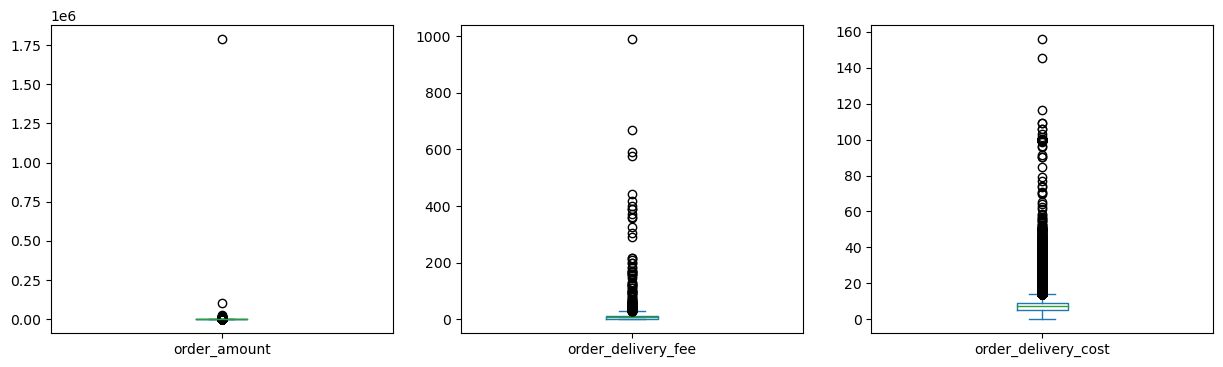

In [7]:
# Checking the distribution of the values in the 'order_amount', 'order_delivery_fee', and 'order_delivery_cost'
# =============================================================================================================

plt.figure(figsize = (15, 4))

# order_amount

plt.subplot(1, 3, 1)

df5['order_amount'].plot(kind = 'box')

# order_delivery_fee

plt.subplot(1, 3, 2)

df5['order_delivery_fee'].plot(kind = 'box')

# order_delivery_cost

plt.subplot(1, 3, 3)

df5['order_delivery_cost'].plot(kind = 'box')

In [59]:
df5['order_amount'].unique()

array([ 62.7 , 115.5 ,  55.9 , ..., 116.62,  51.76,  42.17])

#### *Dataset: "payments"*

In [8]:
df6.head()

,payment_id,payment_order_id,payment_amount,payment_fee,payment_method,payment_status
0,4427917,68410055,118.44,0.00,VOUCHER,PAID
1,4427918,68410055,394.81,7.90,ONLINE,PAID
2,4427941,68412721,206.95,5.59,ONLINE,PAID
3,4427948,68413340,58.80,1.59,ONLINE,PAID
4,4427955,68414018,45.80,0.92,ONLINE,PAID


In [61]:
df6.shape

(400834, 6)

In [62]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400834 entries, 0 to 400833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   payment_id        400834 non-null  int64  
 1   payment_order_id  400834 non-null  int64  
 2   payment_amount    400834 non-null  float64
 3   payment_fee       400659 non-null  float64
 4   payment_method    400834 non-null  object 
 5   payment_status    400834 non-null  object 
dtypes: float64(2), int64(2), object(2)
memory usage: 18.3+ MB


In [63]:
# Changing the data type of 'payment_id' and 'payment_order_id' columns to <object>
# =================================================================================

change_type(df6, 'payment_id', str)

change_type(df6, 'payment_order_id', str)

In [64]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400834 entries, 0 to 400833
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   payment_id        400834 non-null  object 
 1   payment_order_id  400834 non-null  object 
 2   payment_amount    400834 non-null  float64
 3   payment_fee       400659 non-null  float64
 4   payment_method    400834 non-null  object 
 5   payment_status    400834 non-null  object 
dtypes: float64(2), object(4)
memory usage: 18.3+ MB


In [65]:
# Checking for duplicate records
# ==============================

print('The "{}" dataset contains {} duplicate records'.format('payments', df6.duplicated().sum()))

The "payments" dataset contains 0 duplicate records


In [66]:
# Changing the text format of the 'payment_method' and the 'payment_status' columns to proper case
# ================================================================================================

df6['payment_method'] = df6['payment_method'].str.title()

df6['payment_status'] = df6['payment_status'].str.title()

In [67]:
# Replacing the payment methods with appropriate categories
# =========================================================

def payment_method_replace(to_replace_words, new_word):
    
    for word in to_replace_words:
        
        df6['payment_method'].replace(to_replace = word, value = new_word, inplace = True)
        
    
payment_method_replace(['Voucher', 'Voucher_Dc', 'Voucher_Ol', 'Voucher_Store'], 'Voucher')

payment_method_replace(['Meal_Benefit'], 'Meal Benefit')

payment_method_replace(['Debit', 'Debit_Store'], 'Debit Card')

payment_method_replace(['Credit', 'Credit_Store', 'Installment_Credit_Store'], 'Credit Card')

payment_method_replace(['Payment_Link'], 'Online')

payment_method_replace(['Money'], 'Cash')

payment_method_replace(['Store_Direct_Payment'], 'Store Direct Payment')

payment_method_replace(['Bank_Transfer_Dc'], 'Bank Transfer')

In [68]:
# Filling the null values in the 'payment_fee' column with 0.00
# =============================================================

df6['payment_fee'] = df6['payment_fee'].fillna(0.00)

In [69]:
# Dataset summary
# ===============

df6.describe()

,payment_amount,payment_fee
count,400834.000000,400834.000000
mean,93.089261,1.879689
std,221.947167,4.539192
min,0.000000,0.000000
25%,32.700000,0.440000
50%,65.880000,1.030000
75%,121.400000,2.700000
max,100000.110000,2000.000000


In [70]:
df6.describe(include = 'object')

,payment_id,payment_order_id,payment_method,payment_status
count,400834,400834,400834,400834
unique,400834,350334,8,3
top,4427917,72971274,Online,Paid
freq,1,9,313990,400381


<AxesSubplot:>

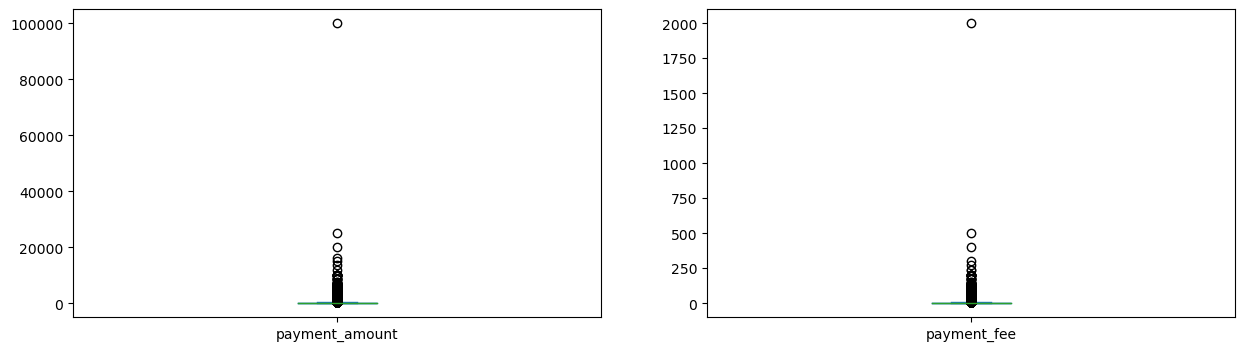

In [71]:
# Checking the distribution of the values in the 'payment_amount' and 'payment_fee' columns
# =========================================================================================

plt.figure(figsize = (15, 4))

# 'payment_amounts'

plt.subplot(1, 2, 1)

df6['payment_amount'].plot(kind = 'box')

# 'payment_fee'

plt.subplot(1, 2, 2)

df6['payment_fee'].plot(kind = 'box')

#### *Dataset: "stores"*

In [72]:
df7.head()

,store_id,hub_id,store_name,store_segment,store_plan_price,store_latitude,store_longitude
0,3,2,CUMIURI,FOOD,0.0,NaN,NaN
1,6,3,PIMGUCIS DA VIVA,FOOD,0.0,-30.037415,-51.203520
2,8,3,RASMUR S,FOOD,0.0,-30.037415,-51.203520
3,53,8,PAPA SUCIS,FOOD,0.0,-22.921475,-43.234822
4,54,8,VUZPI PAZZIS,FOOD,0.0,-22.921475,-43.234822


In [73]:
df7.shape

(951, 7)

In [74]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          951 non-null    int64  
 1   hub_id            951 non-null    int64  
 2   store_name        951 non-null    object 
 3   store_segment     951 non-null    object 
 4   store_plan_price  836 non-null    float64
 5   store_latitude    935 non-null    float64
 6   store_longitude   935 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 52.1+ KB


In [75]:
# Changing the data type of 'store_id' and 'hub_id' columns to <object>
# =====================================================================

change_type(df7, 'store_id', str)

change_type(df7, 'hub_id', str)

In [76]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 951 entries, 0 to 950
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   store_id          951 non-null    object 
 1   hub_id            951 non-null    object 
 2   store_name        951 non-null    object 
 3   store_segment     951 non-null    object 
 4   store_plan_price  836 non-null    float64
 5   store_latitude    935 non-null    float64
 6   store_longitude   935 non-null    float64
dtypes: float64(3), object(4)
memory usage: 52.1+ KB


In [77]:
# Checking for duplicate records
# ==============================

print('The "{}" dataset contains {} duplicate records'.format('stores', df7.duplicated().sum()))

The "stores" dataset contains 0 duplicate records


In [78]:
# Checking for null records
# =========================

df7.isnull().sum()

store_id              0
hub_id                0
store_name            0
store_segment         0
store_plan_price    115
store_latitude       16
store_longitude      16
dtype: int64

In [79]:
# Changing the text format in the 'store_name' and the 'store_segment' columns to proper case
# ===========================================================================================

df7['store_name'] = df7['store_name'].str.title()

df7['store_segment'] = df7['store_segment'].str.title()

In [80]:
# Filling the null records of 'store_plan_price' column with the average of prices of each of the store segments
# ==============================================================================================================

# calculate the average price of store plans for the 'Food' and 'Good' store segments, excluding any missing values

food_store_price_avg = df7.loc[(df7['store_segment'] == 'Food') & (~df7['store_plan_price'].isnull()), 'store_plan_price'].mean()

good_store_price_avg = df7.loc[(df7['store_segment'] == 'Good') & (~df7['store_plan_price'].isnull()), 'store_plan_price'].mean()

# fill in missing values in the 'store_plan_price' column for the 'Food' and 'Good' store segments with the calculated average prices

df7.loc[df7['store_segment'] == 'Food', 'store_plan_price'] = df7.loc[df7['store_segment'] == 'Food', 'store_plan_price'].fillna(food_store_price_avg)

df7.loc[df7['store_segment'] == 'Good', 'store_plan_price'] = df7.loc[df7['store_segment'] == 'Good', 'store_plan_price'].fillna(good_store_price_avg)


In [81]:
# Rounding the decimal points of the 'store_plan_price' column
# ============================================================

df7['store_plan_price'] = df7['store_plan_price'].round(2)

In [82]:
# Removing the 'store_latitude' and 'store_longitude' columns
# ===========================================================

df7 = df7.drop(columns = ['store_latitude', 'store_longitude'])

In [83]:
# Dataset summary
# ===============

df7.describe()

,store_plan_price
count,951.000000
mean,34.700463
std,13.545204
min,0.000000
25%,29.000000
50%,29.900000
75%,49.000000
max,49.900000


<AxesSubplot:>

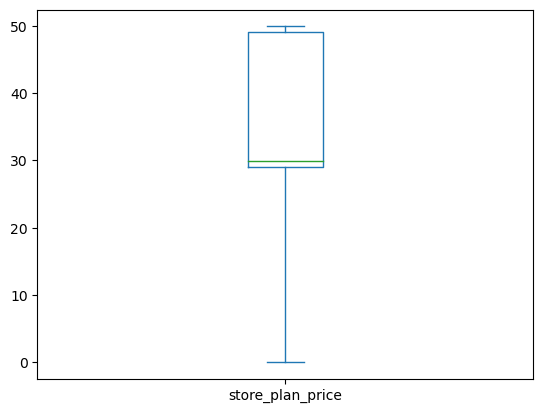

In [84]:
# Checking the distribution of values in the 'store_plan_price' column
# ====================================================================

df7['store_plan_price'].plot(kind = 'box')

In [85]:
df7.describe(include = 'object')

,store_id,hub_id,store_name,store_segment
count,951,951,951,951
unique,951,32,480,2
top,3,20,Salito,Good
freq,1,68,17,567


 -----------------------------------------------------------------------------------------------------------------------

## Objectives:

#### The following are the business questions that need to be answered through this analysis: 
 
  - #### What are the most popular delivery channels among customers?

  - #### Which hubs have the highest and lowest order volume?

  - #### What are the most popular store segments among customers?
  
  - #### What is the average delivery time for different delivery channels?

  - #### How does the delivery distance affect the delivery cost and delivery time?

  - #### Which payment methods are most frequently used by customers?

  - #### How do the delivery distance and delivery status affect the driver's earning?

  - #### How does the order amount affect the delivery fee and delivery cost?

  - #### How does the delivery cost vary with respect to the day of the week?

  - #### Is there a significant difference in the average order amount between different payment methods?

 -----------------------------------------------------------------------------------------------------------------------

## Data analysis and visualizations

#### 1) What are the most popular delivery channels among customers?

In [86]:
# merging the 'orders' and 'channels' datasets using the common column 'channel_id' with inner join 

joined_df1 = pd.merge(df1, df5, on = 'channel_id', how = 'inner')

channel_name
Other Place       9204
Choco Place      10367
London Place     12474
Eats Place       15109
Food Place      288723
Name: order_id, dtype: int64


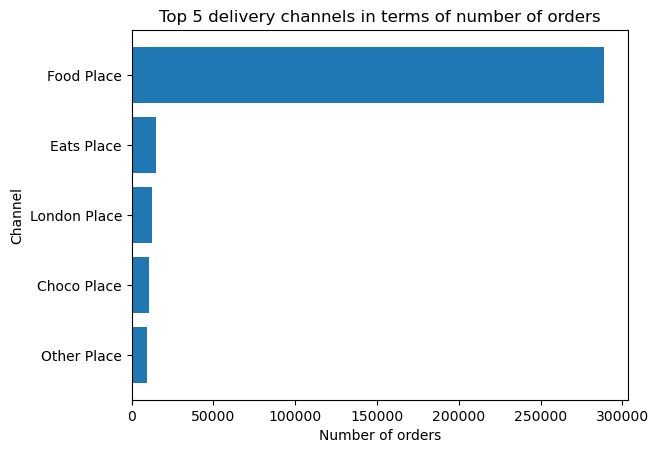

In [87]:
# grouping the orders by the delivery channels and getting the count of orders per channel

order_count_per_channel = joined_df1.groupby('channel_name')['order_id'].nunique()

# selecting the top 5 channels with the most number of orders and sorting them in ascending order

top_channels = order_count_per_channel.nlargest(5).sort_values(ascending = True)

# printing the top delivery channels and their number of orders

print(top_channels)

# plotting a horizontal bar chart with the top channels and their corresponding order counts

plt.barh(top_channels.index, top_channels.values)

# setting the title, x-axis label and y-axis label for the plot

plt.title('Top 5 delivery channels in terms of number of orders')

plt.ylabel('Channel')

plt.xlabel('Number of orders')

# display the plot

plt.show()

#### 2) Which hubs have the highest and lowest order volume?

In [88]:
# merge the dataframes 'df7' and 'df4' on the 'hub_id' column using an inner join, and store the result in 'joined_df2'

joined_df2 = pd.merge(df7, df4, on = 'hub_id', how = 'inner')

# merge the resulting dataframe 'joined_df2' with 'df5' on the 'store_id' column using an inner join, and store the result in 'joined_df3'

joined_df3 = pd.merge(joined_df2, df5, on = 'store_id', how = 'inner')

hub_name
Green Shopping      21139
Hip Hop Shopping    21230
Pagode Shopping     22771
Subway Shopping     23155
Golden Shopping     44868
Name: order_id, dtype: int64
hub_name
Garoa Shopping       1
Red Shopping         2
Hubless Shopping     5
Blue Shopping       13
Funk Shopping       89
Name: order_id, dtype: int64


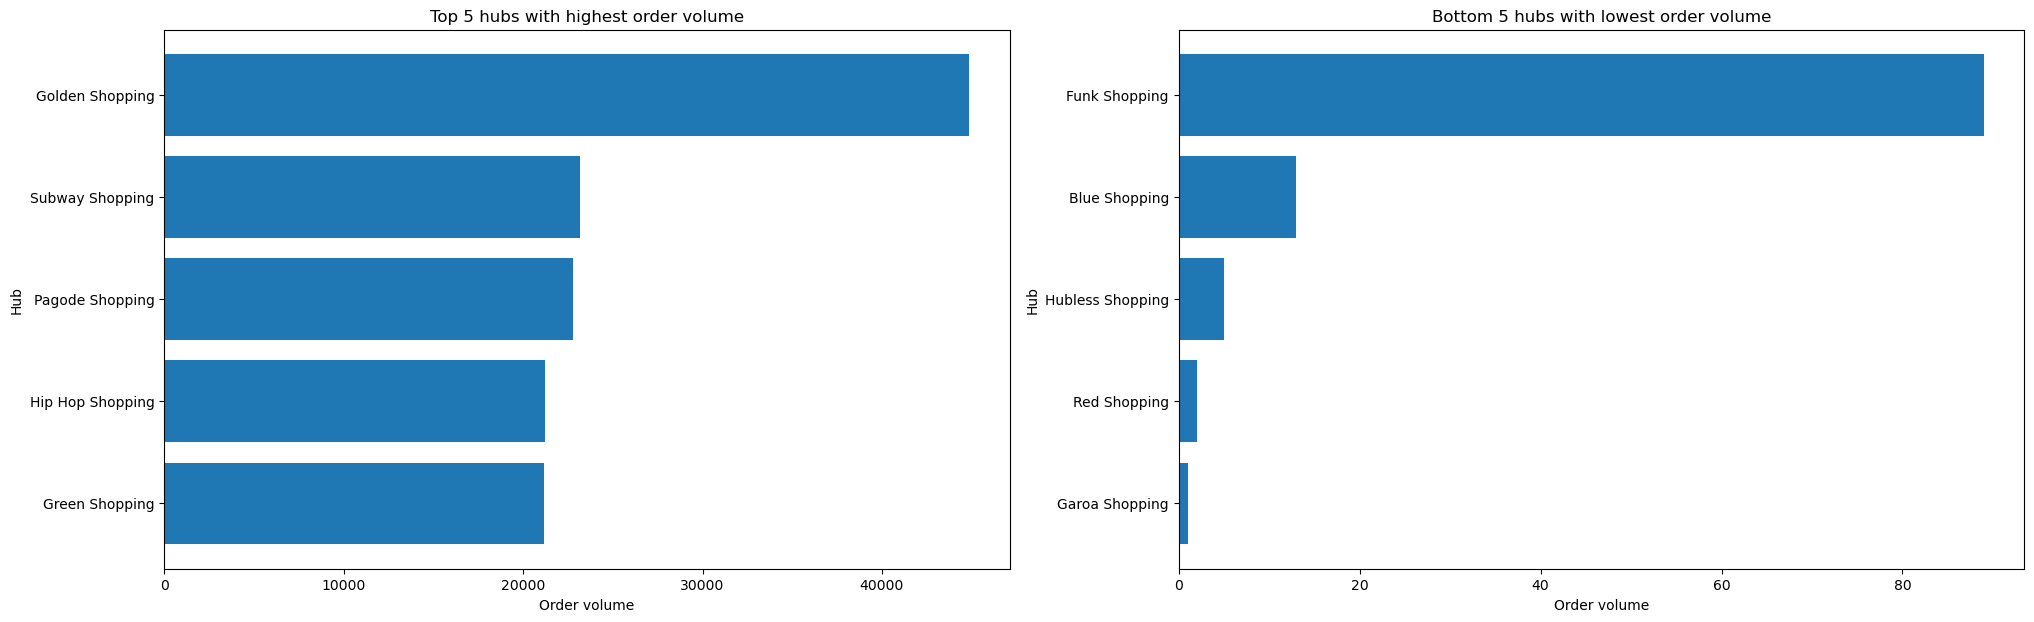

In [89]:
# group the orders in the 'joined_df3' dataframe by their corresponding 'hub_name' and count how many unique orders are in each group

order_volume_per_hub = joined_df3.groupby('hub_name')['order_id'].nunique()

# select the top 5 hubs with the highest order volume by sorting the 'order_volume_per_hub' series in descending order,
# taking the top 5 values, and then sorting them again in ascending order

top_hubs = order_volume_per_hub.nlargest(5).sort_values(ascending = True)

# print the top 5 hubs with the highest order volume

print(top_hubs)

# select the bottom 5 hubs with the lowest order volume by sorting the 'order_volume_per_hub' series in ascending order and taking the top 5 values

bottom_hubs = order_volume_per_hub.nsmallest(5)

# print the bottom 5 hubs with the lowest order volume

print(bottom_hubs)

# create a new figure with size (24, 7) for the plots

plt.figure(figsize = (24, 7))

# create a horizontal bar chart in the left subplot (121) with the 'top_hubs' index as the x-axis,
# 'top_hubs' values as the y-axis, and set the plot title, x-label, and y-label

plt.subplot(121)

plt.barh(top_hubs.index, top_hubs.values)

# add a title and labels for the x and y axes

plt.title('Top 5 hubs with highest order volume')

plt.ylabel('Hub')

plt.xlabel('Order volume')

# create a horizontal bar chart in the right subplot (122) with the 'bottom_hubs' index as the x-axis,
# 'bottom_hubs' values as the y-axis, and set the plot title, x-label, and y-label

plt.subplot(122)

plt.barh(bottom_hubs.index, bottom_hubs.values)

# add a title and labels for the x and y axes

plt.title('Bottom 5 hubs with lowest order volume')

plt.ylabel('Hub')

plt.xlabel('Order volume')

# display the plots

plt.show()

#### 3) What are the most popular store segments among customers?

In [90]:
# merge the two data frames, df5 and df7, on the 'store_id' column, using inner join

# the result is stored in a new data frame, 'joined_df4'

joined_df4 = pd.merge(df5, df7, on = 'store_id', how = 'inner')

store_segment
Good     47224
Food    321775
Name: order_id, dtype: int64


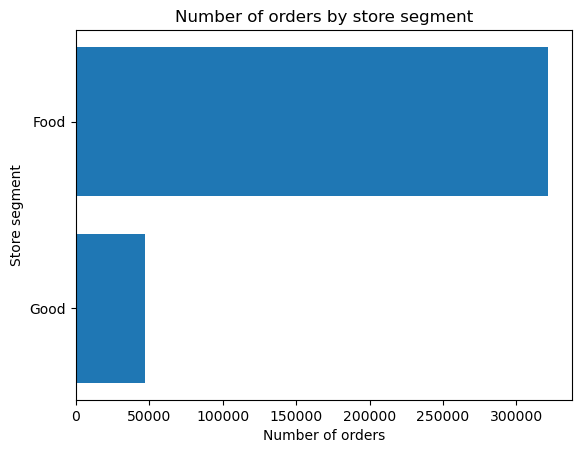

In [91]:
# group joined_df4 by 'store_segment' column and count unique values of 'order_id' column for each group

# sort the resulting series in ascending order of order counts

orders_per_store_segment = joined_df4.groupby('store_segment')['order_id'].nunique().sort_values(ascending = True)

# print the resulting series of order counts for each store segment

print(orders_per_store_segment)

# create a horizontal bar chart using the order count series, with store segment as the y-axis and order count as the x-axis

plt.barh(orders_per_store_segment.index, orders_per_store_segment.values)

# add a title and labels for the x and y axes

plt.title('Number of orders by store segment')

plt.ylabel('Store segment')

plt.xlabel('Number of orders')

# display the plot

plt.show()

#### 4) What is the average delivery time for different delivery channels?

In [92]:
# create two different dataframes for the 'Food' and 'Good' segments

food_segment_df = joined_df4[joined_df4['store_segment'] == 'Food']

goods_segment_df = joined_df4[joined_df4['store_segment'] == 'Good']

# join 'food_segment_df' and 'goods_segment_df' with the 'channels' dataframe using the common column 'channel_id'

food_joined = pd.merge(food_segment_df, df1, on = 'channel_id', how = 'inner')

goods_joined = pd.merge(goods_segment_df, df1, on = 'channel_id', how = 'inner')

channel_name
Speed Place                0 days 00:20:23
Atchin Place               0 days 00:37:38
Riba Place                 0 days 00:43:06
Wear Place                 0 days 00:43:16
Ronald Place     0 days 00:49:04.997487437
Ready Place      0 days 00:53:43.364102564
Caicai Place               0 days 01:01:31
Eats Place       0 days 01:08:40.651520423
Velocity Place   0 days 01:14:52.328450180
Food Place       0 days 01:19:49.097750073
Other Place      0 days 01:31:20.226170140
Own Place        0 days 01:59:14.684491978
Search Place     0 days 02:04:00.083333333
Store Place      0 days 02:16:39.314465408
Longo Place                0 days 02:22:31
Shopp Place      0 days 02:27:19.727272727
Phone Place      0 days 02:35:50.439024390
San Place                  0 days 03:16:51
Berlin Place     0 days 04:00:45.383720930
Whats Place      0 days 04:04:40.120967741
Lisbon Place     0 days 04:15:02.775732788
Register Place   0 days 04:20:48.125208681
Think Place      0 days 04:20:48.24444444

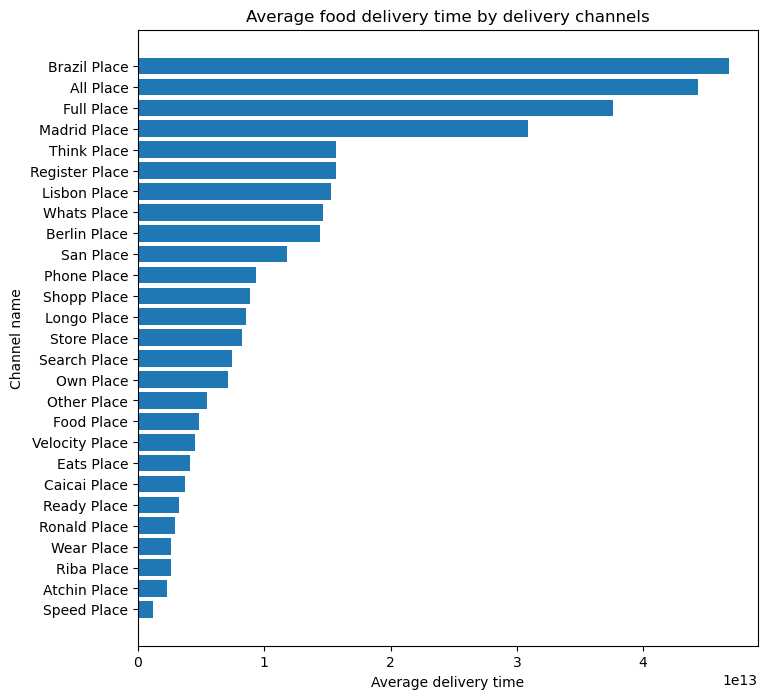

In [93]:
# Food segment
# ============

# calculate the delivery time by subtracting the order creation time from the order finish time

food_joined['delivery_time'] = food_joined['order_moment_finished'] - food_joined['order_moment_created']

# group the orders by delivery channel and calculate the average delivery time for each channel, then sort the values in ascending order

avg_food_delivery_time = food_joined.groupby('channel_name')['delivery_time'].mean().sort_values(ascending = True)

# print 'avg_food_delivery_time'

print(avg_food_delivery_time)

# plot a horizontal bar chart with the delivery channels on the y-axis and their corresponding average delivery times on the x-axis

plt.figure(figsize = (8, 8))

plt.barh(avg_food_delivery_time.index, avg_food_delivery_time.values)

# add a title and labels for the x and y axes

plt.title('Average food delivery time by delivery channels')

plt.ylabel('Channel name')

plt.xlabel('Average delivery time')

# display the plot

plt.show()

channel_name
On Place                   0 days 00:31:30
Speed Place                0 days 00:32:04
Porto Place                0 days 00:44:27
All Place                  0 days 00:47:18
Super Place      0 days 01:00:46.051282051
Eats Place       0 days 01:17:41.141935483
Food Place       0 days 01:20:41.562908811
Face Place                 0 days 02:20:12
Store Place      0 days 03:24:48.809716599
Madrid Place     0 days 03:33:12.736842105
Berlin Place     0 days 03:52:56.886904761
Lisbon Place     0 days 03:53:45.908476339
Whats Place      0 days 04:07:10.047516198
Own Place        0 days 04:10:54.878504672
Choco Place      0 days 04:55:15.066801824
Other Place      0 days 05:01:47.149134487
Phone Place      0 days 05:42:50.666666666
Velocity Place   0 days 05:53:12.230769230
Search Place     0 days 07:48:57.428571428
Think Place      0 days 09:43:12.513157894
Panceps Place    0 days 09:59:52.183139534
Shopp Place      0 days 10:50:52.684358853
Center Place     0 days 13:55:36.46987951

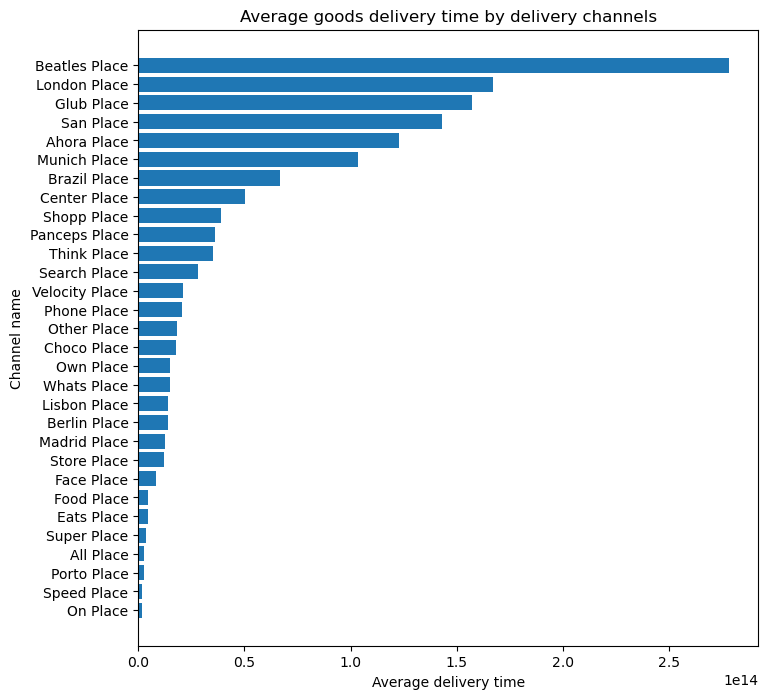

In [94]:
# Goods segment
# ============

# calculate the delivery time by subtracting the order creation time from the order finish time

goods_joined['delivery_time'] = goods_joined['order_moment_finished'] - goods_joined['order_moment_created']

# group the orders by delivery channel and calculate the average delivery time for each channel, then sort the values in ascending order

avg_goods_delivery_time = goods_joined.groupby('channel_name')['delivery_time'].mean().sort_values(ascending = True)

# print 'avg_goods_delivery_time'

print(avg_goods_delivery_time)

# plot a horizontal bar chart with the delivery channels on the y-axis and their corresponding average delivery times on the x-axis

plt.figure(figsize = (8, 8))

plt.barh(avg_goods_delivery_time.index, avg_goods_delivery_time.values)

# add a title and labels for the x and y axes

plt.title('Average goods delivery time by delivery channels')

plt.ylabel('Channel name')

plt.xlabel('Average delivery time')

# display the plot

plt.show()

#### 5) How does the delivery distance affect the delivery cost and delivery time?

In [95]:
# convert delivery distance from meters to kilometers

df2['delivery_distance_km'] = df2['delivery_distance_meters'] / 1000

# round the delivery distance to 2 decimal places

df2['delivery_distance_km'] = df2['delivery_distance_km'].round(2)

In [96]:
# merge the 'food_joined' dataframe with the 'deliveries' dataframe on the 'delivery_order_id' column using inner join

joined_df5 = pd.merge(food_joined, df2, on = 'delivery_order_id', how = 'inner')

# merge the 'goods_joined' dataframe with the 'deliveries' dataframe on the 'delivery_order_id' column using inner join

joined_df6 = pd.merge(goods_joined, df2, on = 'delivery_order_id', how = 'inner')

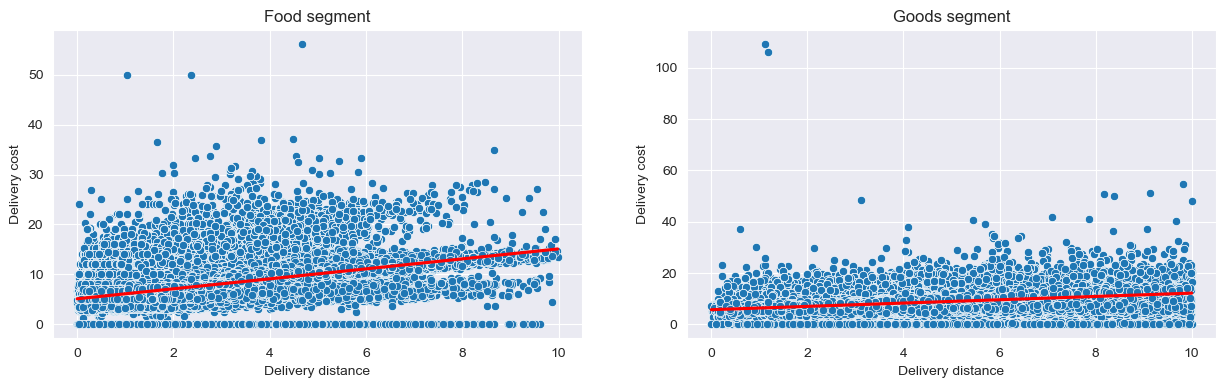

In [97]:
# Checking the relationship between the delivery distance and the delivery cost for the two store segments
# ========================================================================================================

# set the style of the plots to "darkgrid"

sns.set_style("darkgrid")

# create a function for plotting the regression plots for each store segment based on the comparison columns specified

def store_segment_regression_plot(dataset1, dataset2, column1, column2, xlabel, ylabel):
    
    # set the size of the figure to 15x4 inches
    
    plt.figure(figsize = (15, 4))
    
    # add a subplot on the left-hand side of the figure
    
    plt.subplot(121)
    
    # create a scatter plot with x and y axis from dataset1
    
    scatter_plot1 = sns.scatterplot(x = column1, y = column2, data = dataset1)
    
    # add a regression line to the scatter plot in red color
    
    regression_plot1 = sns.regplot(x = column1, y = column2, data = dataset1, scatter = False, color = 'red')
    
    # set the labels and title of the scatter plot
    
    scatter_plot1.set(xlabel = xlabel, ylabel = ylabel, title = 'Food segment')
    
    # add a subplot on the right-hand side of the figure
    
    plt.subplot(122)
    
    # create a scatter plot with x and y axis from dataset2
    
    scatter_plot2 = sns.scatterplot(x = column1, y = column2, data = dataset2)
    
    # add a regression line to the scatter plot in red color
    
    regression_plot2 = sns.regplot(x = column1, y = column2, data = dataset2, scatter = False, color = 'red')
    
    # set the labels and title of the scatter plot
    
    scatter_plot2.set(xlabel = xlabel, ylabel = ylabel, title = 'Goods segment')
    
    # display the plots
    
    plt.show()
    
# call the function with two dataframes, x and y axis, and titles for the two subplots

store_segment_regression_plot(joined_df5, joined_df6, 'delivery_distance_km', 'order_delivery_cost', 'Delivery distance', 'Delivery cost')

In [98]:
# Checking the relationship between the delivery distance and the delivery cost for each of the top delivery channels
# ===================================================================================================================

# create the function channels_regression_plot to create the regression plots for each delivery channels based on the comparison columns specified

def channels_regression_plot(datasets, column1, column2, xlabel, ylabel):
    
    # nested function that creates a regression plot for a specific delivery channel
    
    def regression_plot(channel_name, data):

        # delivery channels to plot
        
        delivery_channels = ['Food Place', 'Eats Place', 'London Place', 'Choco Place', 'Other Place']

        # create a subplot for the current delivery channel
        
        plt.subplot(151 + delivery_channels.index(channel_name))

        # create a scatter plot for the current delivery channel
        
        scatter_plot = sns.scatterplot(x = column1, y = column2, data = data[data['channel_name'] == channel_name])

        # create a regression plot for the current delivery channel
        
        regression_plot = sns.regplot(x = column1, y = column2, data = data[data['channel_name'] == channel_name], scatter = False, color = 'red')

        # set the axis labels and title for the current delivery channel
        
        scatter_plot.set(xlabel = xlabel, ylabel = ylabel, title = channel_name)

    # set the overall figure size
    
    plt.figure(figsize = (20,4))

    # create a plot for each dataset and delivery channel
    
    for channel in ['Food Place', 'Eats Place', 'London Place', 'Choco Place', 'Other Place']:
        
        # call the regression_plot function for plotting the regression plot for each of the delivery channels
        
        regression_plot(channel, data = datasets.pop(0))

    # display the plots

    plt.show()

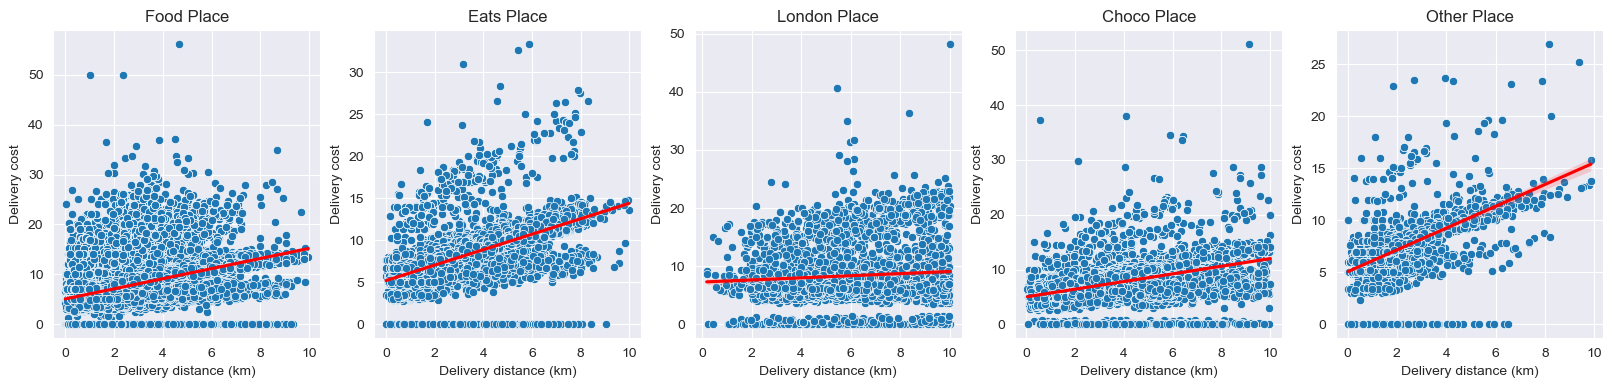

In [99]:
# list of dataframes to be used for each delivery channel

datasets = [joined_df5, joined_df5, joined_df6, joined_df6, joined_df5]

# call the channels_regression_plot function to create the regression plots

channels_regression_plot(datasets, 'delivery_distance_km', 'order_delivery_cost', 'Delivery distance (km)', 'Delivery cost')

In [100]:
# Calculating the coefficients of correlation for each of the delivery channels
# =============================================================================

# creating a function for calculating the coefficients of correlation for each of the delivery channels based on the dataset columns

def print_coefficient_of_correlation(channels_dataset_dict, column1, column2):
    
    # iterate through each channel and its corresponding dataset in the dictionary
    
    for channel, dataset in channels_dataset_dict.items():
    
        # calculate the correlation coefficient between column1 and column2 for the current dataset and channel
    
        coefficient_of_correlation = dataset[dataset['channel_name'] == channel][column1].corr(dataset[dataset['channel_name'] == channel][column2])
    
        # print out the channel name and its corresponding correlation coefficient
    
        print('{}:'.format(channel), coefficient_of_correlation)
        
# define a dictionary with the names of the delivery channels and the corresponding datasets

channels_data = {'Food Place':joined_df5, 'Eats Place':joined_df5, 'London Place':joined_df6, 'Choco Place':joined_df6, 'Other Place':joined_df5}

# printing the coefficients of correlation

print_coefficient_of_correlation(channels_data, 'delivery_distance_km', 'order_delivery_cost')

Food Place: 0.5033620276913193
Eats Place: 0.5727307188692041
London Place: 0.06983255256642314
Choco Place: 0.41970030869097746
Other Place: 0.5210981246804975


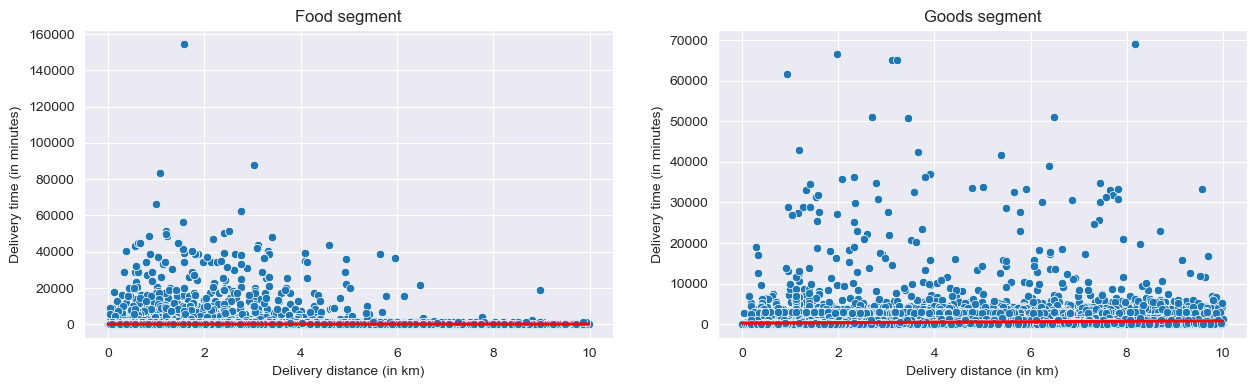

In [101]:
# Checking the relationship between the delivery distance and the delivery time for each of the segments
# ==================================================================================================

# convert delivery time to minutes

joined_df5['delivery_time_minutes'] = joined_df5['delivery_time'].dt.total_seconds() / 60

joined_df6['delivery_time_minutes'] = joined_df6['delivery_time'].dt.total_seconds() / 60

# call the store_segment_regression_plot function for creating the regression plots for each segment

store_segment_regression_plot(joined_df5, joined_df6, 'delivery_distance_km', 'delivery_time_minutes', 'Delivery distance (in km)', 'Delivery time (in minutes)')

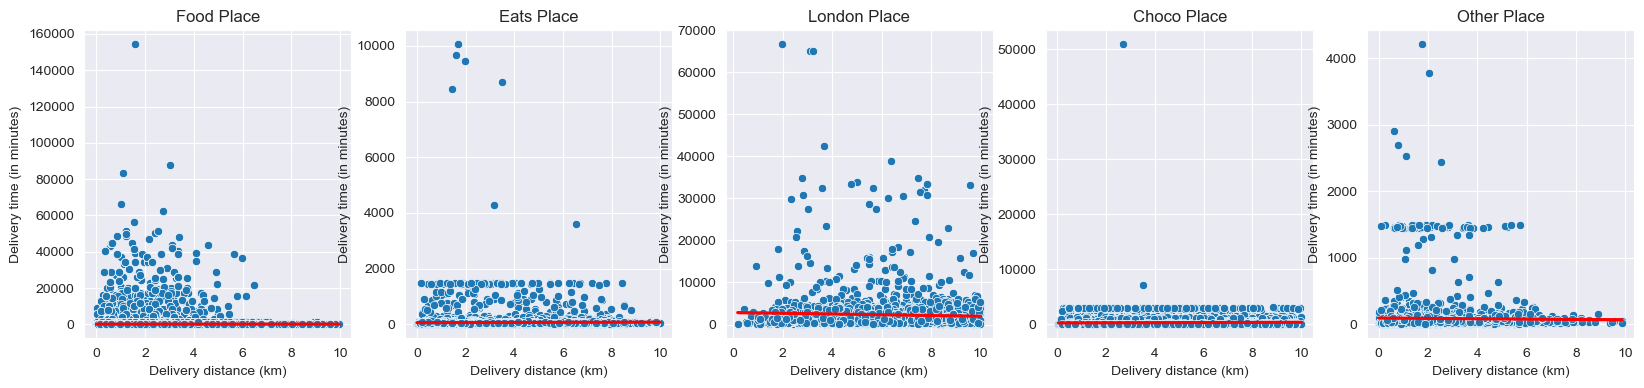

In [102]:
# Checking the relationship between the delivery distance and the delivery time for each of the top delivery channels
# ===================================================================================================================

# list of dataframes

channels_datasets = [joined_df5, joined_df5, joined_df6, joined_df6, joined_df5]

# define a function that creates a scatter plot and a regression line for the relationship between delivery time and order delivery cost for a given delivery channel

channels_regression_plot(channels_datasets, 'delivery_distance_km', 'delivery_time_minutes', 'Delivery distance (km)', 'Delivery time (in minutes)')

In [103]:
# Calculating the coefficients of correlation for each of the delivery channels
# =============================================================================

print_coefficient_of_correlation(channels_data, 'delivery_distance_km', 'delivery_time_minutes')

Food Place: 0.0029926643113031373
Eats Place: 0.011861878784175817
London Place: -0.05160124957997651
Choco Place: 0.03394718840012521
Other Place: -0.015451834734970346


#### 6) Which payment methods are most frequently used by customers?

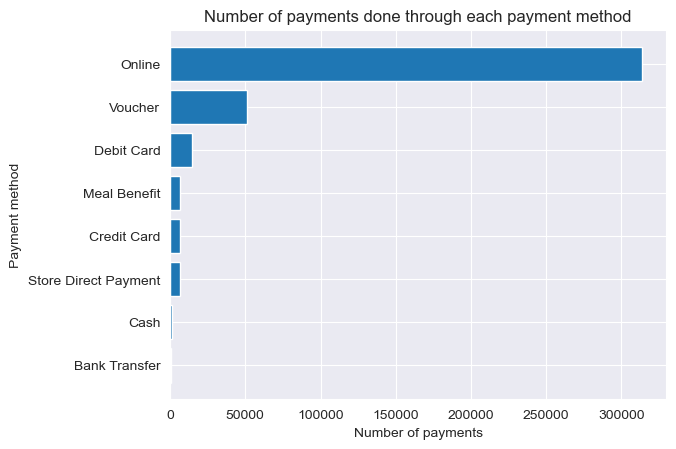

In [104]:
# group the 'payment_id' column in the 'payments' dataframe by 'payment_method' and count the unique payment IDs for each payment method

orders_per_payment_method = df6.groupby('payment_method')['payment_id'].nunique().sort_values(ascending = True)

# create a horizontal bar plot using the payment method names as the y-axis values and the number of payments as the x-axis values

plt.barh(orders_per_payment_method.index, orders_per_payment_method.values)

# set the title of the plot to 'Number of payments done through each payment method'

plt.title('Number of payments done through each payment method')

# set the label of the x-axis to 'Number of payments'

plt.xlabel('Number of payments')

# set the label of the y-axis to 'Payment method'

plt.ylabel('Payment method')

# display the plot

plt.show()

#### 7) How do the delivery distance and delivery status affect the driver's earning?

In [105]:
# merge the joined_df5 dataframe with the 'payments' dataframe where the payment status is paid

joined_df7 = pd.merge(joined_df5, df6[df6['payment_status'] == 'Paid'], on='payment_order_id', how='inner')

# merge the joined_df6 dataframe with the 'payments' dataframe where the payment status is paid

joined_df8 = pd.merge(joined_df6, df6[df6['payment_status'] == 'Paid'], on='payment_order_id', how='inner')

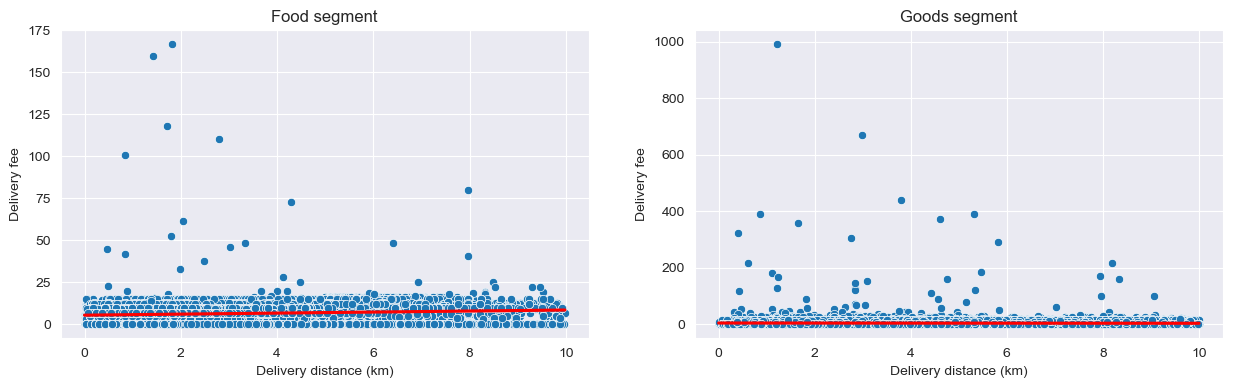

In [106]:
# Checking the relationship between the delivery distance and the delivery fee for each of the segments
# ==================================================================================================

# call the store_segment_regression_plot for creating the regression plots for each store segment to compare the delivery distance and order delivery cost

store_segment_regression_plot(joined_df7, joined_df8, 'delivery_distance_km', 'order_delivery_fee', 'Delivery distance (km)', 'Delivery fee')

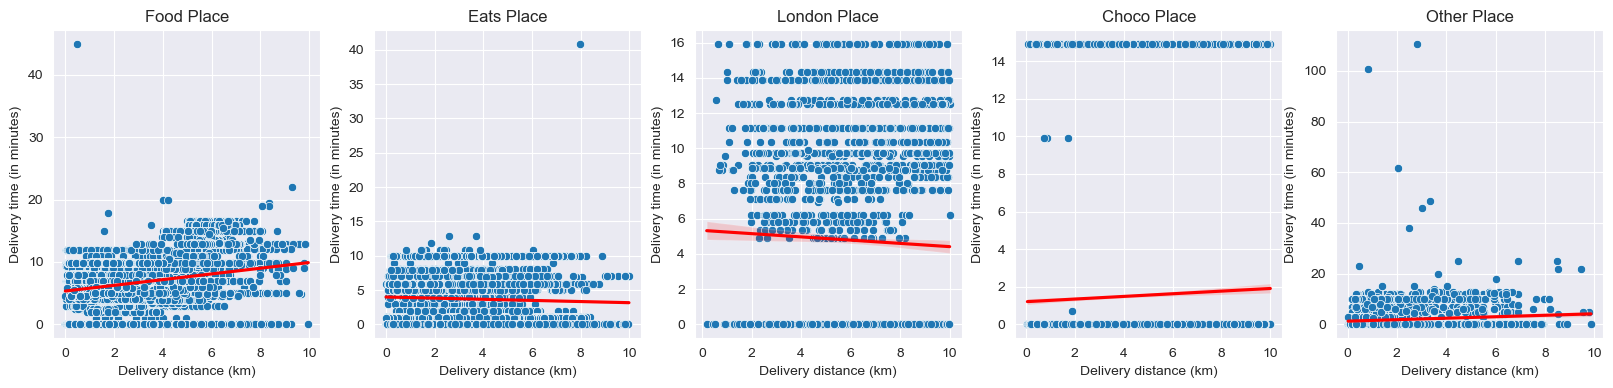

In [107]:
# Checking the relationship between the delivery distance and the payment amounts for each of the delivery channels
# =================================================================================================================

# list of dataframes 

channels_datasets = [joined_df7, joined_df7, joined_df8, joined_df8, joined_df7]

# call the channels_regression_plot function to create the regression plots for each delivery channels comparing the delivery distance and the order delivery fee

channels_regression_plot(channels_datasets, 'delivery_distance_km', 'order_delivery_fee', 'Delivery distance (km)', 'Delivery time (in minutes)')

In [108]:
# Calculating the coefficients of correlation for each of the delivery channels
# =============================================================================

# create a dictionary mapping channel names to their corresponding dataframes

channels_and_datasets = {'Food Place':joined_df7, 'Eats Place':joined_df7, 'London Place':joined_df8, 'Choco Place':joined_df8, 'Other Place':joined_df7}

# call the print_coefficient_of_correlation function with the specified dataset dictionary and column names

print_coefficient_of_correlation(channels_and_datasets, 'delivery_distance_km', 'order_delivery_fee')

Food Place: 0.1275099778947388
Eats Place: -0.048579769143656144
London Place: -0.03946939346434592
Choco Place: 0.036970365114873796
Other Place: 0.09461937690261431


store_segment
Good    4.90
Food    7.46
dtype: float64


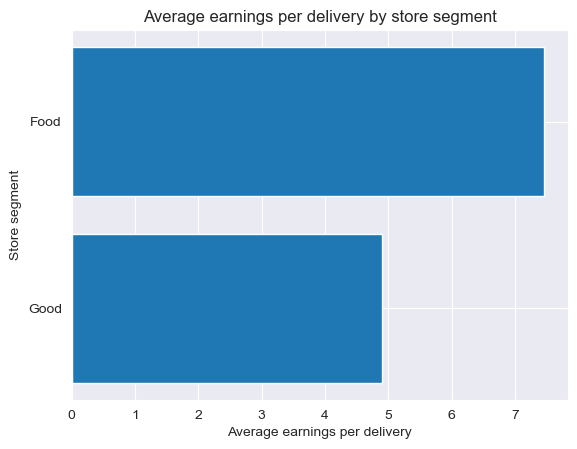

In [109]:
# Calculating the average earnings per delivery 
# =============================================

# combine joined_df7 and joined_df8 vertically

combined_df = pd.concat([joined_df7, joined_df8], axis = 0)

# create function to calculate the average earnings per delivery for each store segment

    # parameters:
    # ----------
    
        # data: input dataframe
    
        # grouping_column: the column name based on which the grouping needs to be performed
    
        # xlabel: label for X-axis
    
        # ylabel: label for Y-axis
    
        # title: title for the plot

def avg_earnings_per_delivery(data, grouping_column, xlabel, ylabel, title):
        
        # calculate the total delivery fee grouped by the specified grouping column
        
        total_earnings = data.groupby(grouping_column)['order_delivery_fee'].sum()

        # calculate the total orders grouped by the specified grouping column
        
        total_orders = data.groupby(grouping_column)['order_id'].nunique()

        # calculate the average earnings per delivery 
        
        avg_earnings_per_delivery = (total_earnings / total_orders).round(2)

        # sort the average earnings per delivery in ascending order
        
        avg_earnings_per_delivery = avg_earnings_per_delivery.sort_values(ascending = True)
        
        # print the values of avg_earnings_per_delivery
        
        print(avg_earnings_per_delivery)
        
        # plot the horizontal bar graph for average earnings per delivery
        
        plt.barh(avg_earnings_per_delivery.index, avg_earnings_per_delivery.values)
        
        # set the title of the plot
        
        plt.title(title)
        
        # set the X-axis label
        
        plt.xlabel(xlabel)
        
        # set the Y-axis label
        
        plt.ylabel(ylabel)
        
        # display the plot
        
        plt.show()

# call the avg_earnings_per_delivery function to plot the average earnings per delivery by store segment

avg_earnings_per_delivery(combined_df, 'store_segment', 'Average earnings per delivery', 'Store segment', 'Average earnings per delivery by store segment')

delivery_status
Cancelled     4.16
Delivering    5.79
Delivered     7.22
dtype: float64


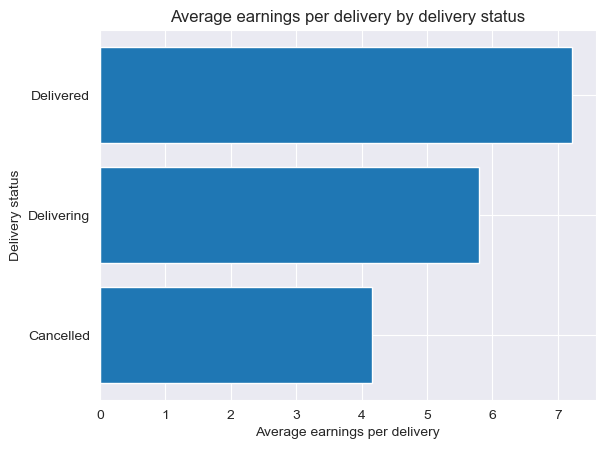

In [110]:
# call the avg_earnings_per_delivery function to plot the average earnings per delivery by delivery status

avg_earnings_per_delivery(combined_df, 'delivery_status', 'Average earnings per delivery', 'Delivery status', 'Average earnings per delivery by delivery status')

#### 8) How does the order amount affect the delivery fee and delivery cost?

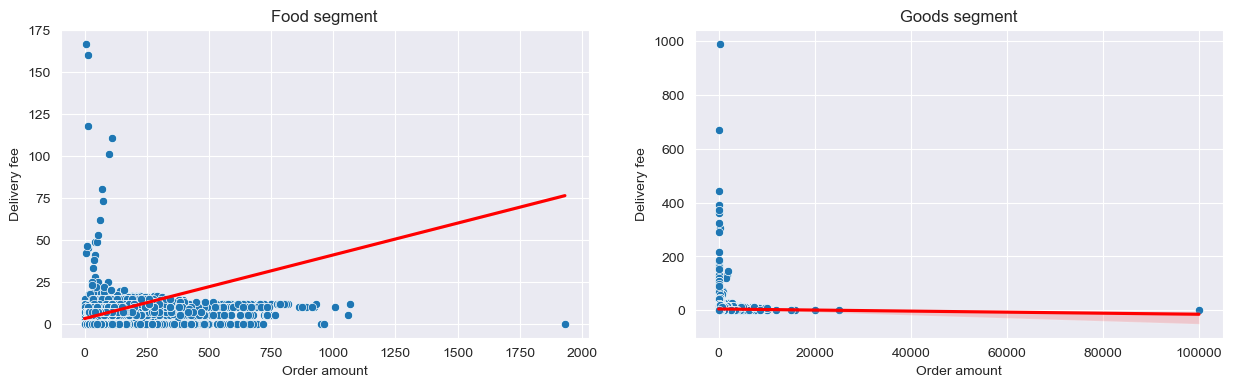

In [111]:
# Checking the relationship between the order amount and the delivery fee for each of the segments
# ==================================================================================================

# call the store_segment_regression_plot function to create the regression plots for each segment

store_segment_regression_plot(joined_df7, joined_df8, 'order_amount', 'order_delivery_fee', 'Order amount', 'Delivery fee')

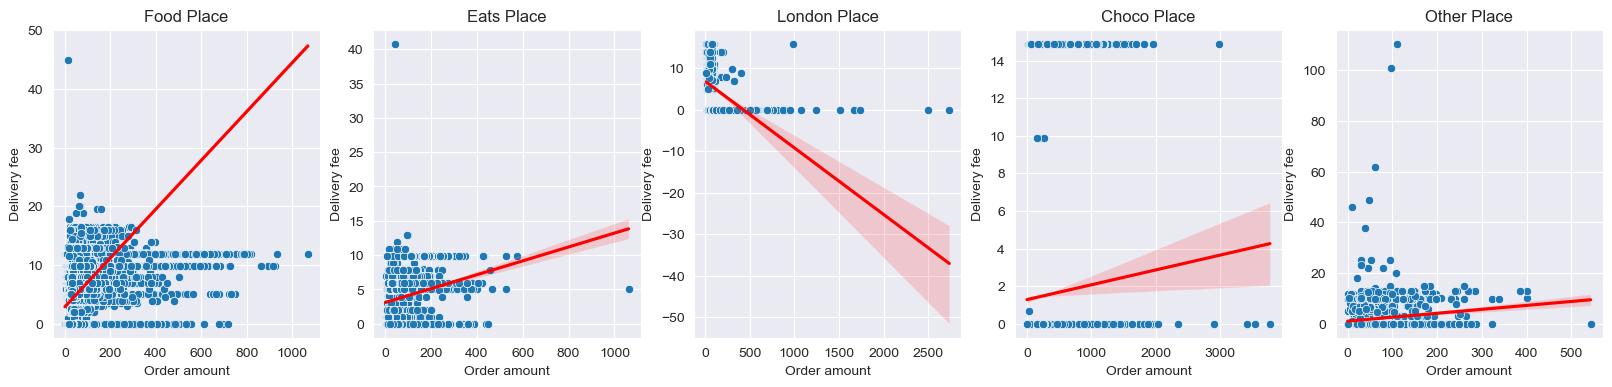

In [112]:
# Checking the relationship between the order amount and the delivery fee for each of the delivery channels
# ==================================================================================================

# list of dataframes 

channels_datasets = [joined_df7, joined_df7, joined_df8, joined_df8, joined_df7]

# call the channels_regression_plot function to create the regression plots for each delivery channels comparing the order amount and the order delivery fee

channels_regression_plot(channels_datasets, 'order_amount', 'order_delivery_fee', 'Order amount', 'Delivery fee')

In [113]:
# Calculating the coefficients of correlation for each of the delivery channels
# =============================================================================

# call the print_coefficient_of_correlation function with the specified dataset dictionary and column names

print_coefficient_of_correlation(channels_and_datasets, 'order_amount', 'order_delivery_fee')

Food Place: 0.491467838848503
Eats Place: 0.12799816496111605
London Place: -0.41465801972218896
Choco Place: 0.03578271100936844
Other Place: 0.1437301741634034


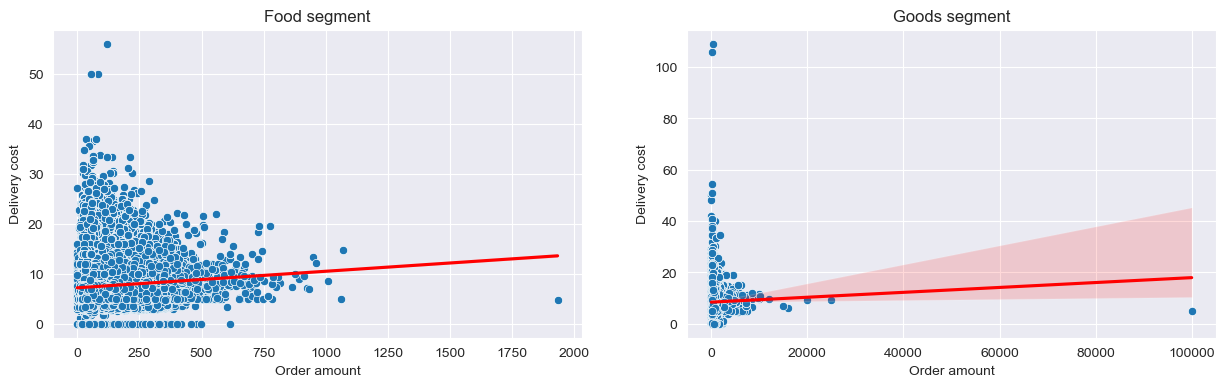

In [114]:
# Checking the relationship between the order amount and the delivery cost for each of the segments
# ==================================================================================================

# call the store_segment_regression_plot function to create the regression plots for each segment

store_segment_regression_plot(joined_df7, joined_df8, 'order_amount', 'order_delivery_cost', 'Order amount', 'Delivery cost')

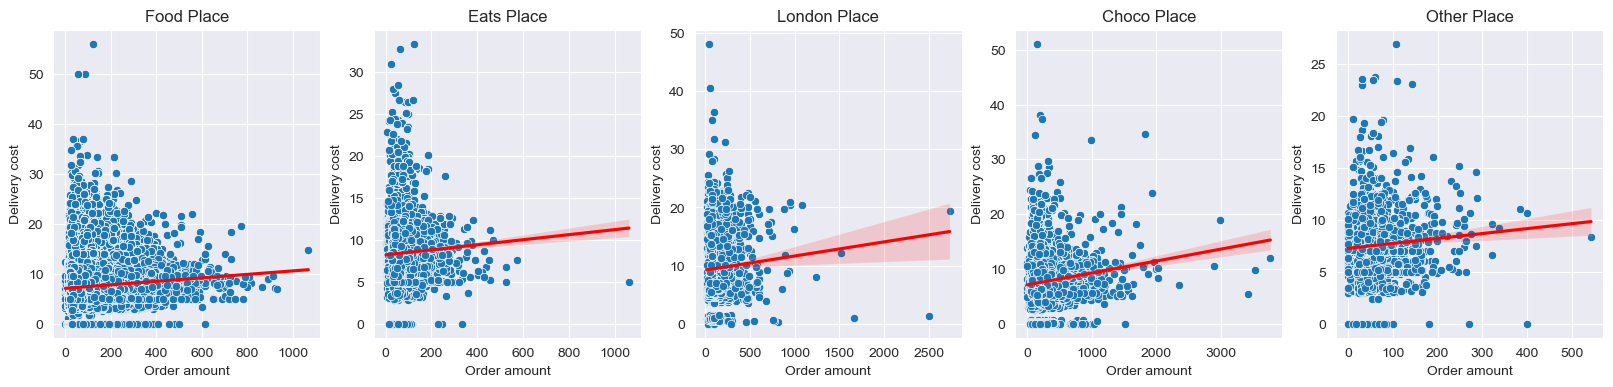

In [115]:
# Checking the relationship between the order amount and the delivery fee for each of the delivery channels
# ==================================================================================================

# list of dataframes 

channels_datasets = [joined_df7, joined_df7, joined_df8, joined_df8, joined_df7]

# call the channels_regression_plot function to create the regression plots for each delivery channels comparing the order amount and the order delivery fee

channels_regression_plot(channels_datasets, 'order_amount', 'order_delivery_cost', 'Order amount', 'Delivery cost')

In [116]:
# Calculating the coefficients of correlation for each of the delivery channels
# =============================================================================

# call the print_coefficient_of_correlation function with the specified dataset dictionary and column names

print_coefficient_of_correlation(channels_and_datasets, 'order_amount', 'order_delivery_cost')

Food Place: 0.07829785298279368
Eats Place: 0.042896694284204034
London Place: 0.060049795777358514
Choco Place: 0.1137891715722634
Other Place: 0.07008728045906794


#### 9) How does the delivery cost vary with respect to the day of the week?

In [117]:
# creating a new column called 'weekday' in the dataframe joined_df7 that contains the day of the week of that particular order placed date

joined_df7['weekday'] = joined_df7['order_moment_created'].dt.day_name()

# creating a new column called 'weekday' in the dataframe joined_df7 that contains the day of the week of that particular order placed date

joined_df8['weekday'] = joined_df8['order_moment_created'].dt.day_name()

In [118]:
# Checking the distribution of delivery cost over the weekdays for each of the store segments
# ===========================================================================================

# define a function to store and plot the delivery cost distribution for each weekday

# parameter:
# ----------

    # data : input dataframe
    
def store_segment_delivery_cost_distribution(data):    
    
    # define a list of weekdays
    
    weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    # set the figure size of the plot
    
    plt.figure(figsize = (24, 18))

    # iterate over each weekday
    
    for weekday in weekdays:
        
        # create a subplot for each weekday
        
        plt.subplot(171 + weekdays.index(weekday))
    
        # extract the delivery cost data for the given weekday
        
        y = np.array(data[data['weekday'] == weekday]['order_delivery_cost'])
    
        # plot the delivery cost data as a line plot
        
        plt.plot(y, linestyle = '-')
    
        # set the title of the plot to the weekday
        
        plt.title(weekday)
    
        # set the ylabel of the plot to 'Delivery cost'
        
        plt.ylabel(ylabel = 'Delivery cost')
    
    # display the plots
    plt.show()
    
    # print the average delivery costs for each day of the week
    
    avg_delivery_cost = print(data.groupby('weekday')['order_delivery_cost'].mean().round(2))

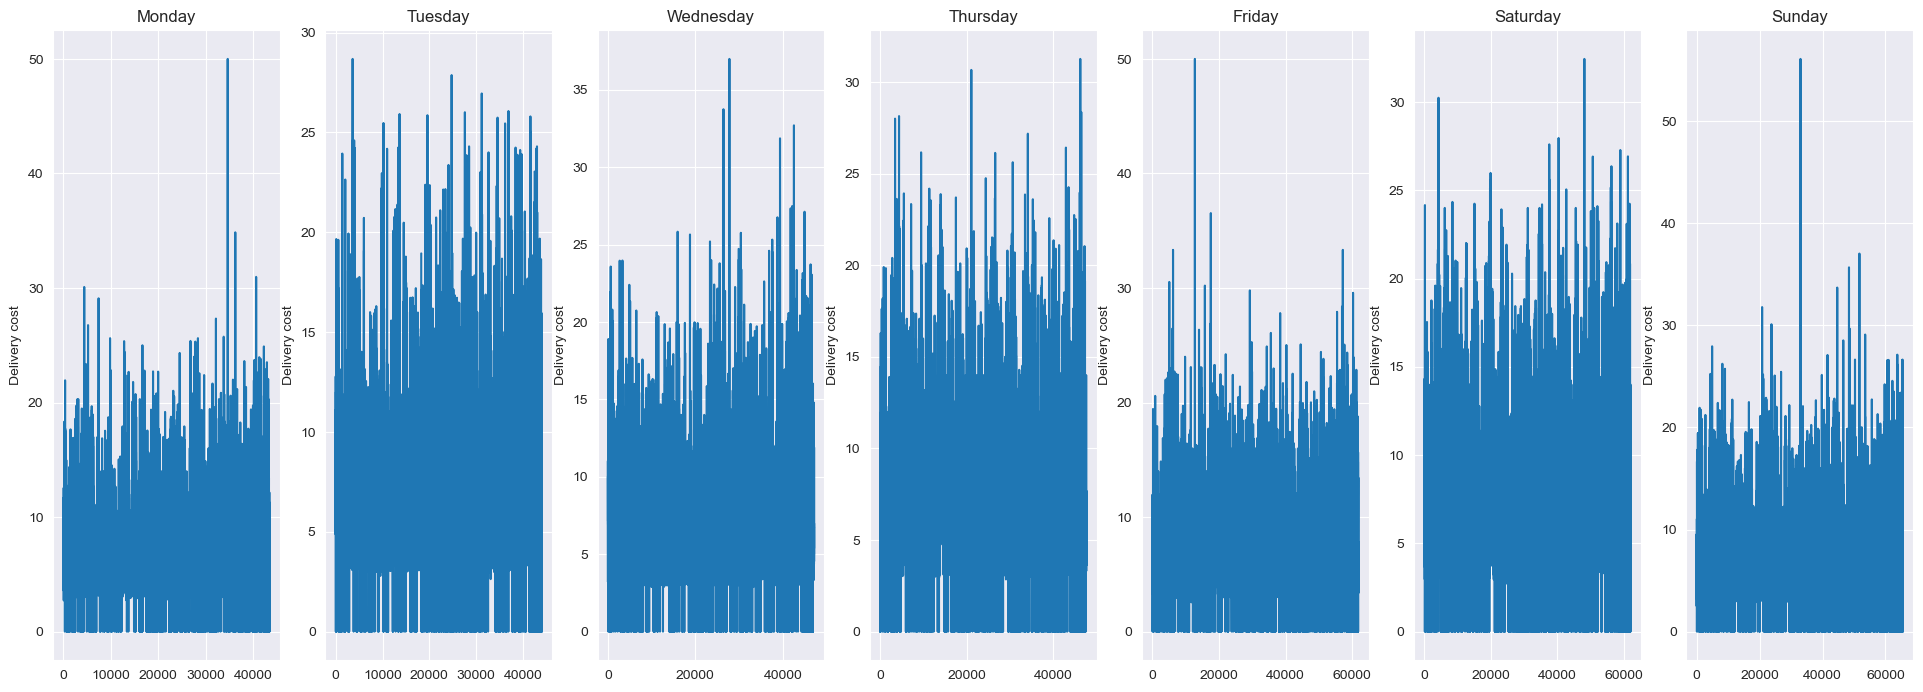

weekday
Friday       7.44
Monday       7.46
Saturday     7.55
Sunday       7.56
Thursday     7.38
Tuesday      7.41
Wednesday    7.37
Name: order_delivery_cost, dtype: float64


In [119]:
# call the  store_segment_delivery_cost_distribution function to plot the delivery costs incurred during each weekday in the food segment

store_segment_delivery_cost_distribution(joined_df7)

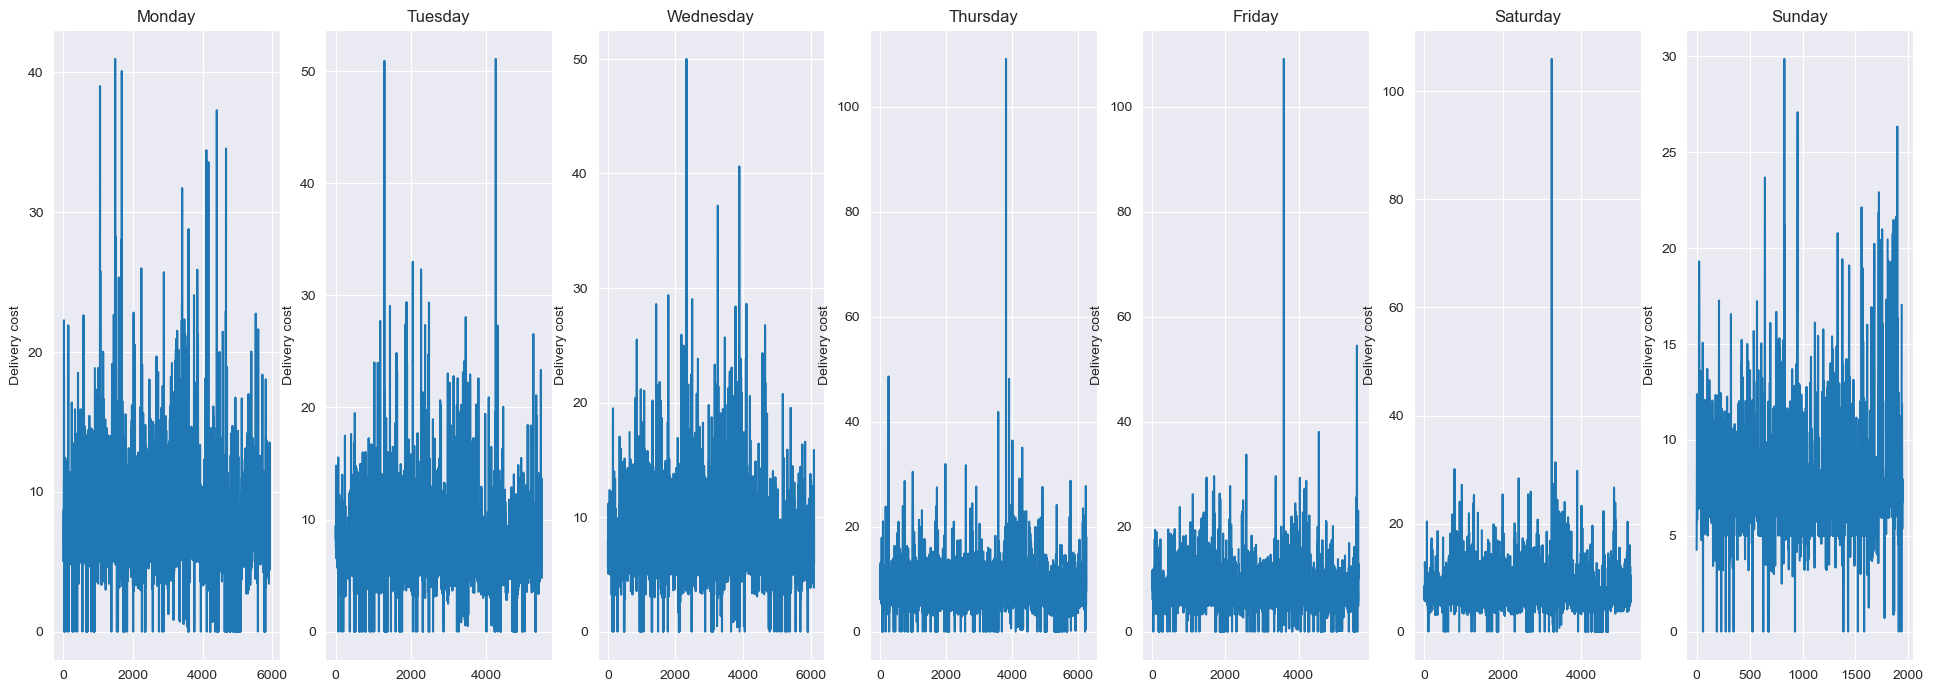

weekday
Friday       8.52
Monday       8.49
Saturday     8.33
Sunday       8.46
Thursday     8.60
Tuesday      8.33
Wednesday    8.28
Name: order_delivery_cost, dtype: float64


In [120]:
# call the  store_segment_delivery_cost_distribution function to plot the delivery costs incurred during each weekday in the food segment

store_segment_delivery_cost_distribution(joined_df8)

#### 10) Is there a significant difference in the average order amount between different payment methods?

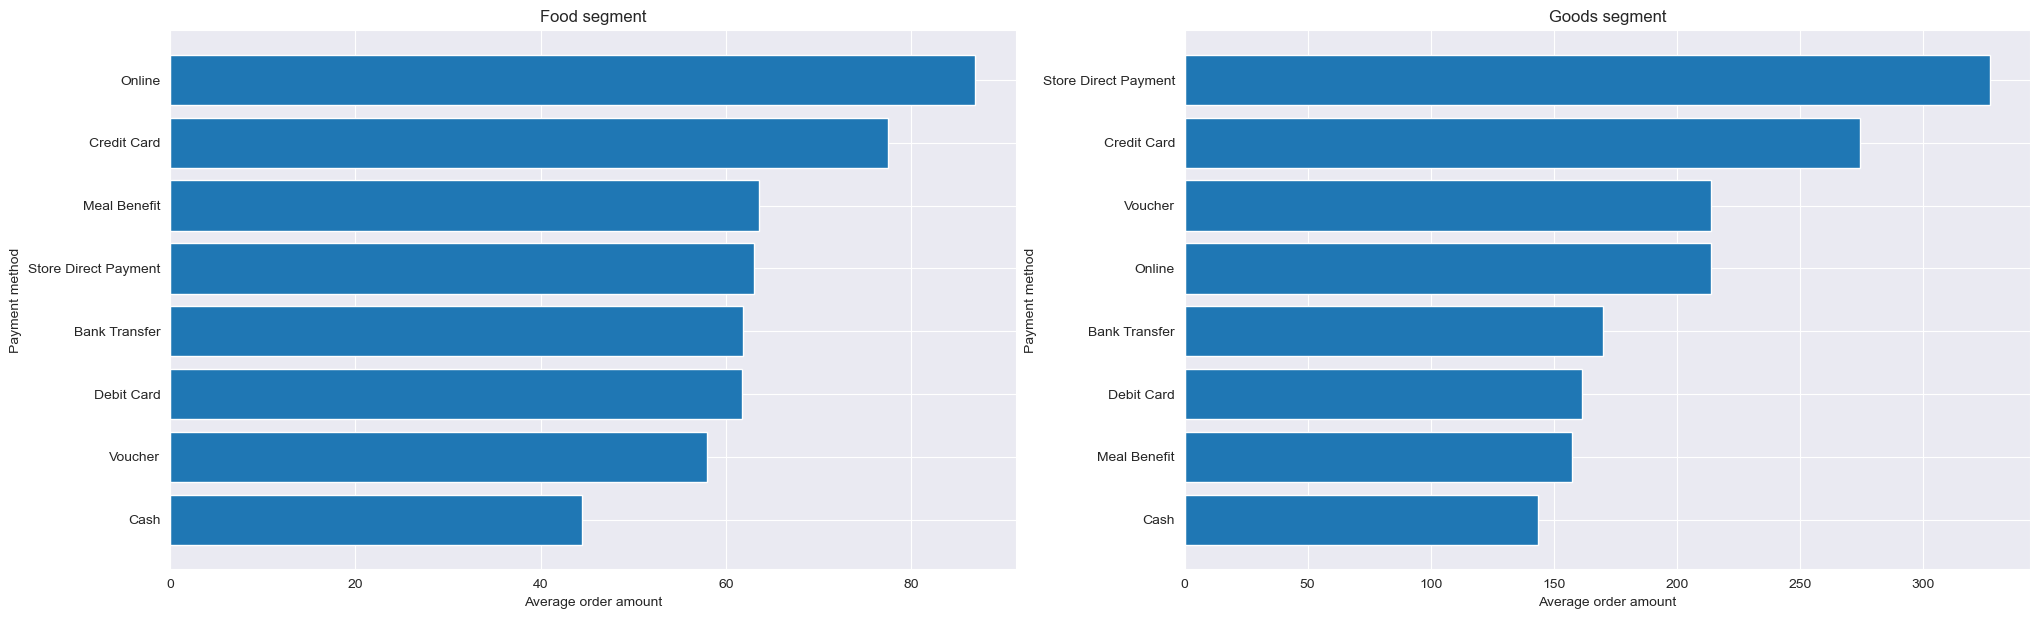

In [173]:
# Calculating the average order amount for each store segment grouped by payment method
# =====================================================================================

# plot a figure with two subplots

plt.figure(figsize = (24, 7))

plt.subplot(121)

# group orders in the food segment by payment method and calculate average order amount, sort by ascending order

avg_order_amount1 = joined_df7.groupby('payment_method')['order_amount'].mean().sort_values(ascending = True)

# plot horizontal bar chart with payment method on y-axis and average order amount on x-axis

plt.barh(avg_order_amount1.index, avg_order_amount1.values)

# set title, x-label, and y-label for first subplot

plt.title('Food segment')

plt.xlabel('Average order amount')

plt.ylabel('Payment method')

plt.subplot(122)

# group orders in the goods segment by payment method and calculate average order amount, sort by ascending order

avg_order_amount2 = joined_df8.groupby('payment_method')['order_amount'].mean().sort_values(ascending = True)

# plot horizontal bar chart with payment method on y-axis and average order amount on x-axis

plt.barh(avg_order_amount2.index, avg_order_amount2.values)

# set title, x-label, and y-label for second subplot

plt.title('Goods segment')

plt.xlabel('Average order amount')

plt.ylabel('Payment method')

# display the plots

plt.show()

In [178]:
# printing the average order amount by payment method for the food segment

print(avg_order_amount1)

payment_method
Cash                    44.468590
Voucher                 57.905843
Debit Card              61.759618
Bank Transfer           61.797867
Store Direct Payment    62.993261
Meal Benefit            63.592570
Credit Card             77.449729
Online                  86.909167
Name: order_amount, dtype: float64


In [179]:
# printing the average order amount by payment method for the goods segment

print(avg_order_amount2)

payment_method
Cash                    143.705000
Meal Benefit            157.537093
Debit Card              161.649385
Bank Transfer           170.182143
Online                  213.955763
Voucher                 213.993963
Credit Card             274.464902
Store Direct Payment    327.254006
Name: order_amount, dtype: float64
